# Use big or small SNP intersections to get snp counts (0, 1, or 2) per subject

In [1]:
# Read in PNC phenotype data

import pickle

fname = '../PNC_agesexwrat.pkl'

with open(fname, 'rb') as f:
    dct = pickle.load(f)

subs_age = list(dct['age'].keys())
subs_age = [str(subid) for subid in subs_age]
print(len(subs_age))

944


In [34]:
# Read in big set of snps

with open('../snps_small.pkl', 'rb') as f:
    snps_big = pickle.load(f)
    
# with open('../snps_small2.pkl', 'wb') as f:
#     pickle.dump(sorted(list(snps_big)), f)
    
print(len(snps_big))

10433


In [35]:
len(list(snps_big))
list(snps_big)[-1]

'rs9997698'

In [46]:
# SNPs for subjects

snps_age = dict()

genome_subs = ['../AAxiom/GO_Axiom',
 '../AGenome/GO_Affy60',
 '../AHuman610/GO_Quad_5removed',
 '../AHumanHapv1/GO_v1_1removed',
 '../AHumanHapv3/GO_v3_1removed',
 '../AHumanOmni/GO_Omni',
 '../Axiom/GO_AxiomTx',
 '../Axiom/GO_Axiom_set2',
 '../BDCHP/GO_v1set2',
 '../Human1M/GO_1MDuo',
 '../Human610/GO_Quadset2',
 '../HumanHap/GO_v3set2',
 '../HumanOmniA/GO_Omniset2',
 '../HumanOmniB/GO_OMNI12v11']

print('Complete')

Complete


In [47]:
import pandas as pd
import pandas_plink as pdpl
import numpy as np

# We lose out on 5 subjects
# Also ../AGenome/GO_Affy60 has duplicates up to 35734

running = []

# fname_base = '../AGenome/GO_Affy60'
for fname_base in genome_subs[:6]:
    print(fname_base)
    (bim, fam, bed) = pdpl.read_plink(fname_base)
    bimsnps = bim[bim['snp'].isin(snps_big)].drop_duplicates(subset='snp', keep='first')
    # Check that order is the same in all sequencing sets
    cursnps = list(bimsnps['snp'])
    i = bimsnps['i']
    i = np.array(list(i))
    if fname_base == '../AHumanHapv1/GO_v1_1removed':
        print('got here')
        itmp = np.zeros(10433)
        curtmp = [x for x in cursnps]
        for oi,ni in enumerate(fixme_idcs):
            i[oi] = i[ni]
            cursnps[oi] = curtmp[ni]
    running.append(cursnps)
    print(i.shape)
    fam_subset = fam[fam['iid'].isin(subs_age)]
    fam_subs = list(fam_subset['iid'])
    j = list(fam_subset['i'])
    j = np.array(list(j))
    print(j.shape)
    resmat = -np.ones((len(i),len(j)))
    step = 4000
    for k in range(0,len(i),step):
        kk = k%step
        mat = bed[i[k:(k+step)]]
        mat = mat[:,j]
        resmat[k:(k+step)] = mat
    print(resmat.shape)
    for i,subid in enumerate(fam_subs):
        if subid in snps_age:
            print(f'Duplicate sub {subid}')
        snps_age[subid] = resmat[:,i]

../AAxiom/GO_Axiom


Mapping files: 100%|███████████████████████████████| 3/3 [00:00<00:00,  5.16it/s]


(10433,)
(5,)
(10433, 5)
../AGenome/GO_Affy60


Mapping files: 100%|███████████████████████████████| 3/3 [00:00<00:00,  3.00it/s]


(10433,)
(9,)
(10433, 9)
../AHuman610/GO_Quad_5removed


Mapping files: 100%|███████████████████████████████| 3/3 [00:00<00:00,  3.06it/s]


(10433,)
(491,)
(10433, 491)
../AHumanHapv1/GO_v1_1removed


Mapping files: 100%|███████████████████████████████| 3/3 [00:00<00:00,  4.40it/s]


got here
(10433,)
(50,)
(10433, 50)
../AHumanHapv3/GO_v3_1removed


Mapping files: 100%|███████████████████████████████| 3/3 [00:00<00:00,  4.21it/s]


(10433,)
(212,)
(10433, 212)
../AHumanOmni/GO_Omni


Mapping files: 100%|███████████████████████████████| 3/3 [00:01<00:00,  2.85it/s]


(10433,)
(160,)
(10433, 160)


In [48]:
i = 0
badi = []
rs2badi = dict()
i2goodrs = dict()
for a,b,c,d,e,f in zip(*running):
    if not all(x == a for x in [b,c,d,e,f]):
        print('Order not the same')
        print([a,b,c,d,e,f])
        print(i)
        badi.append(i)
        i2goodrs[i] = a
        rs2badi[d] = i
    i += 1
print(badi)
fixme_idcs = np.arange(10433)
for i in badi:
    fixme_idcs[i] = rs2badi[i2goodrs[i]]

[]


In [7]:
print(fixme_idcs[2637:2661])

[2657 2658 2659 2660 2637 2638 2639 2640 2641 2642 2643 2644 2645 2646
 2647 2648 2649 2650 2651 2652 2653 2654 2655 2656]


In [49]:
# Save running SNP order by chromosomes

with open('../snps_small_order.pkl', 'wb') as f:
    pickle.dump(running[0], f)
    
with open('../snps_small_order.pkl', 'rb') as f:
    tst = pickle.load(f)
    
print(all([x == y for x,y in zip(tst, running[0])]))

True


In [52]:
running[0][-100]

'rs2018358'

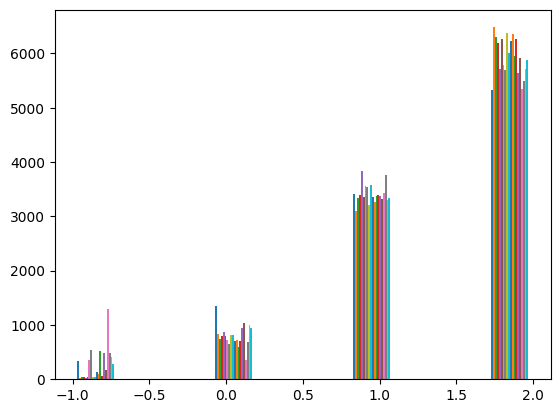

In [53]:
import matplotlib.pyplot as plt

resmat = np.zeros((len(snps_age),10433))
for i,vec in enumerate(snps_age.values()):
    resmat[i] = vec
    
resmat[np.isnan(resmat)] = -1
plt.hist(resmat[:20].T)
plt.show()

In [20]:
len(snps_big)

35621

In [54]:
subs_sex = list(dct['wrat'].keys())
x = []
y = []
for i in range(len(subs_sex)):
    subid = subs_sex[i]
    subidstr = str(subid)
    if subidstr in snps_age:
        sex = dct['wrat'][subs_sex[i]]
        x0 = snps_age[subidstr] == 0
        x1 = snps_age[subidstr] == 1
        x2 = snps_age[subidstr] == 2
#         x3 = np.isnan(snps_age[subidstr])
        x.append(np.concatenate([x0,x1,x2]))
#         xa = snps_age[subidstr]
#         x.append(xa)
        y.append(sex)
#         print(y[-1])
    else:
        print(f'{subid} not here')

x = np.stack(x)
x[np.isnan(x)] = 0 #np.random.randint(low=0,high=3,size=np.sum(np.isnan(x)))
y = np.array(y)
print(x.shape)
print(y.shape)

600001676724 not here
600003245643 not here
600004963801 not here
600005394890 not here
600005726384 not here
600008688531 not here
600010814166 not here
600012815174 not here
600013511285 not here
600014077099 not here
600014544658 not here
600014890602 not here
600015643764 not here
600017580352 not here
600019106408 not here
600020094335 not here
600020364885 not here
600020441091 not here
600020689310 not here
600021243740 not here
600023312864 not here
600026109097 not here
600027602842 not here
600027860077 not here
600028377384 not here
600029072268 not here
600029548560 not here
600036522762 not here
600039584621 not here
600040437792 not here
600041066800 not here
600041433819 not here
600041559013 not here
600042864050 not here
600043261599 not here
600043480768 not here
600045155842 not here
600046154336 not here
600046401483 not here
600046972953 not here
600047205119 not here
600047873887 not here
600049500438 not here
600049785291 not here
600051174659 not here
6000511878

(924, 31299)
(924,)


In [80]:
from sklearn.linear_model import LogisticRegression

idcs = np.random.permutation(y.shape[0])
ntrain = 700

xtr = x[idcs[:ntrain]]
xt = x[idcs[ntrain:]]

ytr = y[idcs[:ntrain]]
yt = y[idcs[ntrain:]]

clf = LogisticRegression(max_iter=1000).fit(xtr, ytr)
yhat = clf.predict(xt)
print(yhat == yt)

KeyboardInterrupt: 

In [63]:
np.sum(yhat == yt)/len(yt)

0.6211453744493393

In [55]:
from sklearn.linear_model import LinearRegression

allrmse = []

for i in range(20):
    idcs = np.random.permutation(y.shape[0])
    ntrain = 700

    xtr = x[idcs[:ntrain]]
    xt = x[idcs[ntrain:]]

    ytr = y[idcs[:ntrain]]
    yt = y[idcs[ntrain:]]

    mu = np.mean(ytr)
    ytr = ytr-mu
    yt = yt-mu

    clf = LinearRegression().fit(xtr, ytr)
    yhat = clf.predict(xt)
    rmse = np.mean((yhat-yt)**2)**0.5
    print(rmse)
    allrmse.append(rmse)
    
print('---')
print(np.mean(np.array(allrmse)))
print(np.std(np.array(allrmse)))

14.747868848279404
14.387963493547298
14.674862181717135
14.272416102550112
13.21388533194642
14.591794420416344
13.573910344327404
13.975719211127375
13.654902435903358
13.653789590192202
13.810213106303653
13.567770539053699
14.735569450053934
14.626922560368223
14.714281055336649
13.359948127284946
14.539411955296682
13.915624906595268
14.445619647583484
15.340756921454458
---
14.190161511466902
0.5602065568688874


In [121]:
ks = list(snps_age.keys())
print(len(ks))
for i in range(1):
    print(snps_age[ks[i]].shape)

927
(10433,)


In [56]:
with open('../snps_age_927_small_correct.pkl', 'wb') as f:
    pickle.dump(snps_age, f)
    
print('Complete')

Complete
